In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import json
import matplotlib.cm as cm


In [19]:
file_path = 'windrose_data_hres.json'

with open(file_path, 'r') as file:
    data = json.load(file)

In [ ]:

# Variables for accurate barometric conversion
R = 8.31432  # N·m /(mol·K)
T = 288.15  # K
g = 9.80665  # m/s²
M = 0.0289644  # kg/mol
P0 = 1013.25  # hPa
dir_dict = {
    'E': 0, 'ENE': 2 * np.pi / 16, 'NE': 2 * 2 * np.pi / 16, 'NNE': 3 * 2 * np.pi / 16,
    'N': 4 * 2 * np.pi / 16, 'NNW': 5 * 2 * np.pi / 16, 'NW': 6 * 2 * np.pi / 16, 
    'WNW': 7 * 2 * np.pi / 16, 'W': 8 * 2 * np.pi / 16, 'WSW': 9 * 2 * np.pi / 16,
    'SW': 10 * 2 * np.pi / 16, 'SSW': 11 * 2 * np.pi / 16, 'S': 12 * 2 * np.pi / 16,
    'SSE': 13 * 2 * np.pi / 16, 'SE': 14 * 2 * np.pi / 16, 'ESE': 15 * 2 * np.pi / 16
}
# Extracts the wind data from the json file
def extract_data(data):
    """
    Extract data for every specific altitude and range of day for every diagram
    """
    compiled_date = []
    compiled_time = []
    compiled_radii = []
    compiled_wind_dir = []
    
    for entry in data['windrose']:
        date = entry['date']
        time = entry['time']
        measurements = entry['data']        
        radii = []
        wind_dir = []
    
        for idx in range(5):
            radii.append(measurements[idx]['speed_kph'])
            dir_dict = {
                'E': 0, 'ENE': 2 * np.pi / 16, 'NE': 2 * 2 * np.pi / 16, 'NNE': 3 * 2 * np.pi / 16,
                'N': 4 * 2 * np.pi / 16, 'NNW': 5 * 2 * np.pi / 16, 'NW': 6 * 2 * np.pi / 16, 
                'WNW': 7 * 2 * np.pi / 16, 'W': 8 * 2 * np.pi / 16, 'WSW': 9 * 2 * np.pi / 16,
                'SW': 10 * 2 * np.pi / 16, 'SSW': 11 * 2 * np.pi / 16, 'S': 12 * 2 * np.pi / 16,
                'SSE': 13 * 2 * np.pi / 16, 'SE': 14 * 2 * np.pi / 16, 'ESE': 15 * 2 * np.pi / 16
            }
            wind_dir.append(dir_dict[measurements[idx]['direction']])

        compiled_date.append(date)
        compiled_time.append(time)
        compiled_radii.append(radii)
        compiled_wind_dir.append(wind_dir)

    return compiled_date, compiled_time, compiled_radii, compiled_wind_dir

def radius_formatter(value, pos):
    return f'{value:.1f} km/h'

def altitude_data(dates, times, rads, winds, dir_dict = dir_dict, range = True):
    #Call the extract_data() function then extract the necessary data according to the index of the altitude
    #directions = ['E', 'ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']
    altitudes = ["~1.5km", "~3km", "~5-6km", "~9km", "~12km"]
    wind_dir = []
    wind_mag = []
    wind_alt = []
    for rad, wind in zip(rads, winds):
        arr_mag = [[None]] * 16
        arr_alt = [None] * 16
        for i, dir in enumerate(dir_dict.values()):
            if dir in wind:
                if arr_mag[i] == None:
                    arr_mag[i] = [rad[wind.index(dir)]]
                else:
                    arr_mag[i].append(rad[wind.index(dir)])
                arr_alt[i] = 1
        wind_mag.append(arr_mag)    
        return wind_dir, wind_mag, wind_alt

        #if dir in wind:
         #   arrange_wind[wind.index(dir)] = dir
    
#print(f'radii: {extract_data(data)[0]}', f'wind: {extract_data(data)[1]}', sep = '\n')
dates, times, rads, winds = extract_data(data)
print(f"radius: \n {rads}")
print(f"winds: \n{winds}")
#a=altitude_data(dates, times, rads, winds)
#print(a[1])    

def graph():
    """
    param: range = value
    """
    ax.yaxis.set_major_formatter(FuncFormatter(radius_formatter))

    ax.set_xticks(np.linspace(0.0, 2 * np.pi, len(directions), endpoint=False))
    ax.set_xticklabels(directions)
    ax.set_title(f"Windrose ({time}, {date})", va='bottom')
    
    ax.legend(bars, labels[:len(radii)], loc='upper right', bbox_to_anchor=(1.2, 1.1))

    highlight_labels = ["~3km", "~5-6km", "~9km"]
    for bar, label in zip(bars, labels):
        if label in highlight_labels:
            bar.set_edgecolor(bar.get_facecolor())  # Set border color
            bar.set_linewidth(5)  # Set border width

    plt.subplots_adjust(left=0.1, right=0.85, top=0.85, bottom=0.1)
    plt.show()


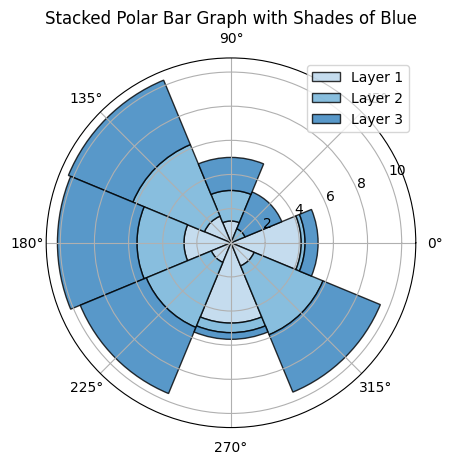

[4.11437430e+00 3.90962124e-03 1.27588031e+00 1.68281110e+00
 2.75443106e+00 1.24333558e+00 4.70522692e+00 1.46571979e+00]


In [30]:
import numpy as np
from matplotlib import colormaps
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Number of sectors (directions)
N = 8
# Angles for each direction
angles = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# Data: Each row represents a "stack" for a specific direction
magnitude1 = np.random.rand(N) * 5  # Base layer magnitudes
magnitude2 = np.random.rand(N) * 5  # Second layer magnitudes
magnitude3 = np.random.rand(N) * 5  # Third layer magnitudes

# Set up polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Define base color and generate shades
base_color = 'blue'
cmap = colormaps['Blues']  # Use a blue color map
colors = [cmap(0.3), cmap(0.5), cmap(0.7)]  # Define shades (adjust values for lighter/darker colors)

# Base layer (bottom) using the lightest shade
ax.bar(angles, magnitude1, width=2*np.pi/N, bottom=0, color=colors[0], edgecolor='k', alpha=0.8, label='Layer 1')

# Second layer (stacked on top of base layer) using a medium shade
ax.bar(angles, magnitude2, width=2*np.pi/N, bottom=magnitude1, color=colors[1], edgecolor='k', alpha=0.8, label='Layer 2')

# Third layer (stacked on top of second layer) using the darkest shade
ax.bar(angles, magnitude3, width=2*np.pi/N, bottom=magnitude1 + magnitude2, color=colors[2], edgecolor='k', alpha=0.8, label='Layer 3')

# Add title and legend
ax.set_title('Stacked Polar Bar Graph with Shades of Blue')
plt.legend()

# Show plot
plt.show()

print(magnitude1)

In [ ]:
val = [None] * 5
val[3] = "Fuck You"
print(val)

In [8]:
dir_dict = {
    'E': 0, 'ENE': 2 * np.pi / 16, 'NE': 2 * 2 * np.pi / 16, 'NNE': 3 * 2 * np.pi / 16,
    'N': 4 * 2 * np.pi / 16, 'NNW': 5 * 2 * np.pi / 16, 'NW': 6 * 2 * np.pi / 16, 
    'WNW': 7 * 2 * np.pi / 16, 'W': 8 * 2 * np.pi / 16, 'WSW': 9 * 2 * np.pi / 16,
    'SW': 10 * 2 * np.pi / 16, 'SSW': 11 * 2 * np.pi / 16, 'S': 12 * 2 * np.pi / 16,
    'SSE': 13 * 2 * np.pi / 16, 'SE': 14 * 2 * np.pi / 16, 'ESE': 15 * 2 * np.pi / 16
}

In [9]:
def extract_data(data):
    """
    Extract data from every specific altitude and date-time combination for each windrose diagram.
    Returns structured data for plotting.
    """
    compiled_date = []
    compiled_time = []
    compiled_radii = []
    compiled_wind_dir = []
    
    # Predefined direction angles for windrose
    dir_dict = {
        'E': 0, 'ENE': 2 * np.pi / 16, 'NE': 2 * 2 * np.pi / 16, 'NNE': 3 * 2 * np.pi / 16,
        'N': 4 * 2 * np.pi / 16, 'NNW': 5 * 2 * np.pi / 16, 'NW': 6 * 2 * np.pi / 16, 
        'WNW': 7 * 2 * np.pi / 16, 'W': 8 * 2 * np.pi / 16, 'WSW': 9 * 2 * np.pi / 16,
        'SW': 10 * 2 * np.pi / 16, 'SSW': 11 * 2 * np.pi / 16, 'S': 12 * 2 * np.pi / 16,
        'SSE': 13 * 2 * np.pi / 16, 'SE': 14 * 2 * np.pi / 16, 'ESE': 15 * 2 * np.pi / 16
    }
    
    for entry in data['windrose']:
        date = entry['date']
        time = entry['time']
        measurements = entry['data']        
        
        radii = []
        wind_dir = []
        
        # Only take the first 5 measurements per entry (adjust if needed)
        for measurement in measurements[:5]:
            radii.append(measurement['speed_kph'])
            wind_dir.append(dir_dict[measurement['direction']])

        compiled_date.append(date)
        compiled_time.append(time)
        compiled_radii.append(radii)
        compiled_wind_dir.append(wind_dir)

    return compiled_date, compiled_time, compiled_radii, compiled_wind_dir


In [10]:
def altitude_data(dates, times, radii, wind_dirs, altitudes=["~1.5km", "~3km", "~5-6km", "~9km", "~12km"]):
    """
    Process extracted data for specific altitude and return wind direction, magnitude, and altitude mappings.
    """
    wind_mag = []  # To hold magnitudes (wind speeds) by direction
    wind_alt = []  # To hold altitude flags for each direction
    
    # Iterate through each entry's radii and wind directions
    for rad, wind in zip(radii, wind_dirs):
        # Initialize arrays for storing magnitudes for 16 wind directions
        arr_mag = [[None] for _ in range(16)]
        arr_alt = [None] * 16
        
        # Map the wind data into the corresponding directions
        for i, wind_dir in enumerate(wind):
            arr_mag[i] = rad[i]  # Corresponding speed for direction
            arr_alt[i] = 1  # Mark as available for plotting
        
        wind_mag.append(arr_mag)
        wind_alt.append(arr_alt)

    return wind_dirs, wind_mag, wind_alt


In [11]:
# First, extract the data from the JSON
dates, times, radii, wind_dirs = extract_data(data)

# Process data for a specific altitude (~850 hPa or similar)
wind_dir, wind_mag, wind_alt = altitude_data(dates, times, radii, wind_dirs)

# Now, you can use `wind_dir`, `wind_mag`, and `wind_alt` for further plotting.


In [24]:
import numpy as np

# Define wind direction dictionary
dir_dict = {
    'E': 0, 'ENE': 2 * np.pi / 16, 'NE': 2 * 2 * np.pi / 16, 'NNE': 3 * 2 * np.pi / 16,
    'N': 4 * 2 * np.pi / 16, 'NNW': 5 * 2 * np.pi / 16, 'NW': 6 * 2 * np.pi / 16, 
    'WNW': 7 * 2 * np.pi / 16, 'W': 8 * 2 * np.pi / 16, 'WSW': 9 * 2 * np.pi / 16,
    'SW': 10 * 2 * np.pi / 16, 'SSW': 11 * 2 * np.pi / 16, 'S': 12 * 2 * np.pi / 16,
    'SSE': 13 * 2 * np.pi / 16, 'SE': 14 * 2 * np.pi / 16, 'ESE': 15 * 2 * np.pi / 16
}

# Function to extract wind data
def extract_data(data, start_date, end_date):
    compiled_data = {alt: {'radii': [], 'directions': []} for alt in ["~1.5km", "~3km", "~5-6km", "~9km", "~12km"]}
    
    for entry in data['windrose']:
        date = entry['date']
        # Check if date is in the specified range
        if start_date <= date <= end_date:
            measurements = entry['data']
            for measurement in measurements:
                altitude = measurement['z_hPa']  # Assuming z_hPa indicates altitude
                speed = measurement['speed_kph']
                direction = measurement['direction']
                
                # Append data to corresponding altitude
                if altitude in compiled_data:
                    compiled_data[altitude]['radii'].append(speed)
                    compiled_data[altitude]['directions'].append(dir_dict[direction])
    
    return compiled_data

# Function to prepare data for composite windrose
def prepare_windrose_data(compiled_data):
    windrose_data = {}
    
    for altitude, values in compiled_data.items():
        arr_mag = [[] for _ in range(16)]  # For each direction
        for speed, direction in zip(values['radii'], values['directions']):
            arr_mag[direction].append(speed)  # Append speed to the corresponding direction
            
        windrose_data[altitude] = arr_mag
    
    return windrose_data

# Example usage
# Replace 'your_data_here' with your actual JSON data and specify the date range
# your_data_here = {
#     "windrose": [
#         {
#             "date": "Month DD, YYYY",
#             "time": "HH:MM AM/PM (PST)",
#             "data": [
#                 {"z_hPa": value, "speed_kph": value, "direction": "N"},
#                 # Add more data entries here...
#             ]
#         }
#         # Add more entries here...
#     ]
# }

# Specify your date range
start_date = "June 03, 2024"  # Replace with actual start date
end_date = "June 09, 2024"    # Replace with actual end date

compiled_data = extract_data(data, start_date, end_date)
windrose_data = prepare_windrose_data(compiled_data)

# Now you can use windrose_data to plot your windrose diagram


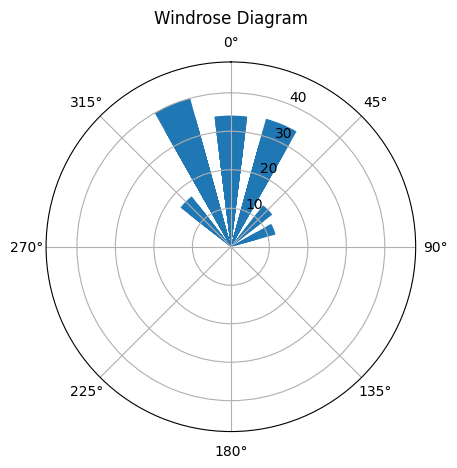

In [22]:
import numpy as np

# Direction dictionary
dir_dict = {
    'E': 0, 'ENE': 2 * np.pi / 16, 'NE': 2 * 2 * np.pi / 16, 'NNE': 3 * 2 * np.pi / 16,
    'N': 4 * 2 * np.pi / 16, 'NNW': 5 * 2 * np.pi / 16, 'NW': 6 * 2 * np.pi / 16, 
    'WNW': 7 * 2 * np.pi / 16, 'W': 8 * 2 * np.pi / 16, 'WSW': 9 * 2 * np.pi / 16,
    'SW': 10 * 2 * np.pi / 16, 'SSW': 11 * 2 * np.pi / 16, 'S': 12 * 2 * np.pi / 16,
    'SSE': 13 * 2 * np.pi / 16, 'SE': 14 * 2 * np.pi / 16, 'ESE': 15 * 2 * np.pi / 16
}

# Extracts the wind data from the json file
def extract_data(data):
    """
    Extract data from the windrose JSON for specific altitudes, dates, and time intervals.
    """
    compiled_date = []
    compiled_time = []
    compiled_radii = []
    compiled_wind_dir = []
    compiled_altitudes = []
    
    for entry in data['windrose']:
        date = entry['date']
        time = entry['time']
        measurements = entry['data']        
        radii = []
        wind_dir = []
        altitudes = []
    
        for measure in measurements:
            radii.append(measure['speed_kph'])
            wind_dir.append(dir_dict[measure['direction']])
            altitudes.append(measure['z_hPa'])

        compiled_date.append(date)
        compiled_time.append(time)
        compiled_radii.append(radii)
        compiled_wind_dir.append(wind_dir)
        compiled_altitudes.append(altitudes)

    return compiled_date, compiled_time, compiled_radii, compiled_wind_dir, compiled_altitudes

def radius_formatter(value, pos):
    return f'{value:.1f} km/h'

# Process data by altitude
def altitude_data(dates, times, rads, winds, altitudes, selected_altitude, dir_dict=dir_dict):
    """
    Filter and process data by the selected altitude (z_hPa) for windrose plotting.
    """
    wind_dir = []
    wind_mag = []

    for date, time, rad, wind, alt in zip(dates, times, rads, winds, altitudes):
        if selected_altitude in alt:
            idx = alt.index(selected_altitude)
            wind_dir.append(wind[idx])
            wind_mag.append(rad[idx])
    
    return wind_dir, wind_mag

# Example function to generate windrose diagram
def plot_windrose(wind_dir, wind_mag):
    import matplotlib.pyplot as plt
    from matplotlib.projections.polar import PolarAxes

    # Create windrose plot
    ax = plt.subplot(111, projection='polar')
    bars = ax.bar(wind_dir, wind_mag, width=0.25, bottom=0.0)
    
    # Formatting
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rmax(max(wind_mag) * 1.2)
    
    ax.set_title("Windrose Diagram", va='bottom')
    ax.grid(True)

    plt.show()

# Example usage
#data = <your_json_data>
dates, times, rads, winds, altitudes = extract_data(data)
wind_dir, wind_mag = altitude_data(dates, times, rads, winds, altitudes, selected_altitude=500)  # Example for 500 hPa
plot_windrose(wind_dir, wind_mag)
